In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [3]:
df = pd.read_csv('AviationData.csv', encoding = 'mac_roman', low_memory = False)

In [4]:
df.drop(['Event.Id', 'Air.carrier', 'Latitude', 'Longitude', 'Airport.Code', 'Injury.Severity', 'Schedule', 'Purpose.of.flight', 'Airport.Name'], axis=1, inplace = True)
#Remove columns: Event.Id, Air.carrier, Latitude, Longitude, Airport.Code, Injury.Severity, Schedule, Purpose.of.flight, Airport.Name

In [5]:
amateur_built = df['Amateur.Built'] == 'Yes'
df = df[~amateur_built]
#Remove amateur-built aircrafts

In [6]:
df = df[df['Aircraft.Category'] == 'Airplane']
#Remove all aircrafts that are not airplanes

In [7]:
df.dropna(subset = ['Make', 'Model'], inplace = True)
#Remove data with no information on Make and Model

In [8]:
df = df.drop(columns = 'Amateur.Built')
#Remove Amateur.Built column

In [9]:
currentheaders = list(df.columns.values)
df.columns = [c.replace('.', ' ').title() for c in currentheaders]
#Clean header titles

In [10]:
df['Country'] = df['Country'].str.upper()
#Convert all values in Country column to upper case

In [11]:
df['Event Date'] = pd.to_datetime(df['Event Date'], yearfirst=True)
#Convert Event Date column to DateTime

In [12]:
df = df.loc[df['Event Date'] >= '1993-01-01']
#Remove data prior to 1993

In [13]:
df = df[df['Country'] == 'UNITED STATES']
#Remove data outside of the United States

In [14]:
df.drop(['Country', 'Aircraft Category', 'Broad Phase Of Flight', 'Weather Condition', 'Publication Date'], axis=1, inplace = True)
#Remove Investigation Type, Country, Aircraft Category, Broad Phase of Flight, Weather Condition, and Publication Date columns

In [15]:
df['Number Of Engines'] = df['Number Of Engines'].fillna(1)
df['Total Fatal Injuries'] = df['Total Fatal Injuries'].fillna(0)
df['Total Serious Injuries'] = df['Total Serious Injuries'].fillna(0)
df['Total Minor Injuries'] = df['Total Minor Injuries'].fillna(0)
df['Total Uninjured'] = df['Total Uninjured'].fillna(0)

#Fill NaNs - Number of Engines with 1 (median/mode), Fatal Injuries with 0 (intended input), Serious Injuries with 0 (intended input), Minor Injuries with 0 (intended input), and Uninjured with 1 (most common value and results in at least 1 passenger for each accident)

In [16]:
df['Aircraft Damage'].replace('Unknown', np.nan, inplace = True)
#Replace 'Unknown' values in Aircraft Damage with NaN

In [17]:
df['Aircraft Damage'].replace('Substantial', 1, inplace = True)
df['Aircraft Damage'].replace('Destroyed', 2, inplace = True)
df['Aircraft Damage'].replace('Minor', 0, inplace = True)
#Assign scores to Aircraft Damage
    #Destroyed = 2, Substantial = 1, Minor = 0

In [18]:
mean_damage = df['Aircraft Damage'].mean()
df['Aircraft Damage'].fillna(mean_damage, inplace = True)
#Fill NaNs in Aircraft Damage with the mean score

In [19]:
df['Make'] = df['Make'].str.upper()
df['Model'] = df['Model'].str.upper()

df['Make'] = df['Make'].str.replace('[^a-zA-Z0-9]', '')
df['Model'] = df['Model'].str.replace('[^a-zA-Z0-9]', '')
#Clean strings in Make column by replacing special characters with ' '

In [20]:
df['Far Description'].replace('091', 91, inplace = True)
df['Far Description'].replace('Part 91: General Aviation', 91, inplace = True)
df['Far Description'].replace('091K', 91, inplace = True)
df['Far Description'].replace('Part 91 Subpart K: Fractional', 91, inplace = True)
df = df[df['Far Description'] == 91]
#Removed commercial flights and narrowed planes down to private flights only

In [21]:
df['Total Passengers'] = df['Total Fatal Injuries'] + df['Total Serious Injuries'] + df['Total Minor Injuries'] + df['Total Uninjured']
df['Total Passengers'].replace(0, 1, inplace = True)
#Create new column, Total Passengers, which combines the total number of people accounted for in a given data point

In [22]:
df['Investigation Type Score'] = df['Investigation Type']
df['Investigation Type Score'] = df['Investigation Type Score'].replace('Accident', 0.9)
df['Investigation Type Score'] = df['Investigation Type Score'].replace('Incident', 1)
#Assign score multiplier to Investigation Type by assigning multiplier of 0.9 to Accidents and multiplier of 1 to Incidents

In [23]:
df['Fatality Injury Score'] = 1 - (((8 * df['Total Fatal Injuries']) + (4 * df['Total Serious Injuries']) + (2 * df['Total Minor Injuries']) + (0 * df['Total Uninjured'])) / (14 * df['Total Passengers']))
#Assign score multiplier to fatalities and injuries by weighting Serious injuries as 2x as detrimental as Minor and Fatal injuries as 2x as detrimental as Serious

In [24]:
df['Plane Damage Score'] = 1 - (df['Aircraft Damage'] / 4)
#Assign score multiplier to plane damage such that completely destroyed planes multiply safety score by 0.5, substantially damaged planes by 0.75, and planes with minor damage by 1

In [25]:
df['Safety Score'] = 1 * df['Investigation Type Score'] * df['Fatality Injury Score'] * df['Plane Damage Score']
#Assigned an overall Safety Score to each data point

In [38]:
df['Make'].replace('IAI', 'ISRAELAIRCRAFTINDUSTRIES', inplace = True)
df['Make'].replace('AEROTEK', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AEROTEKINC', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIAT', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIATAIRCRAFTINC', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIATINC', 'AEROTEKAVIAT', inplace = True)
df['Make'].replace('AVIATAIRCRAFT', 'AEROTEKAVIAT', inplace = True)

In [39]:
df.to_csv('AviationDataCleaned.csv')

<BarContainer object of 15781 artists>

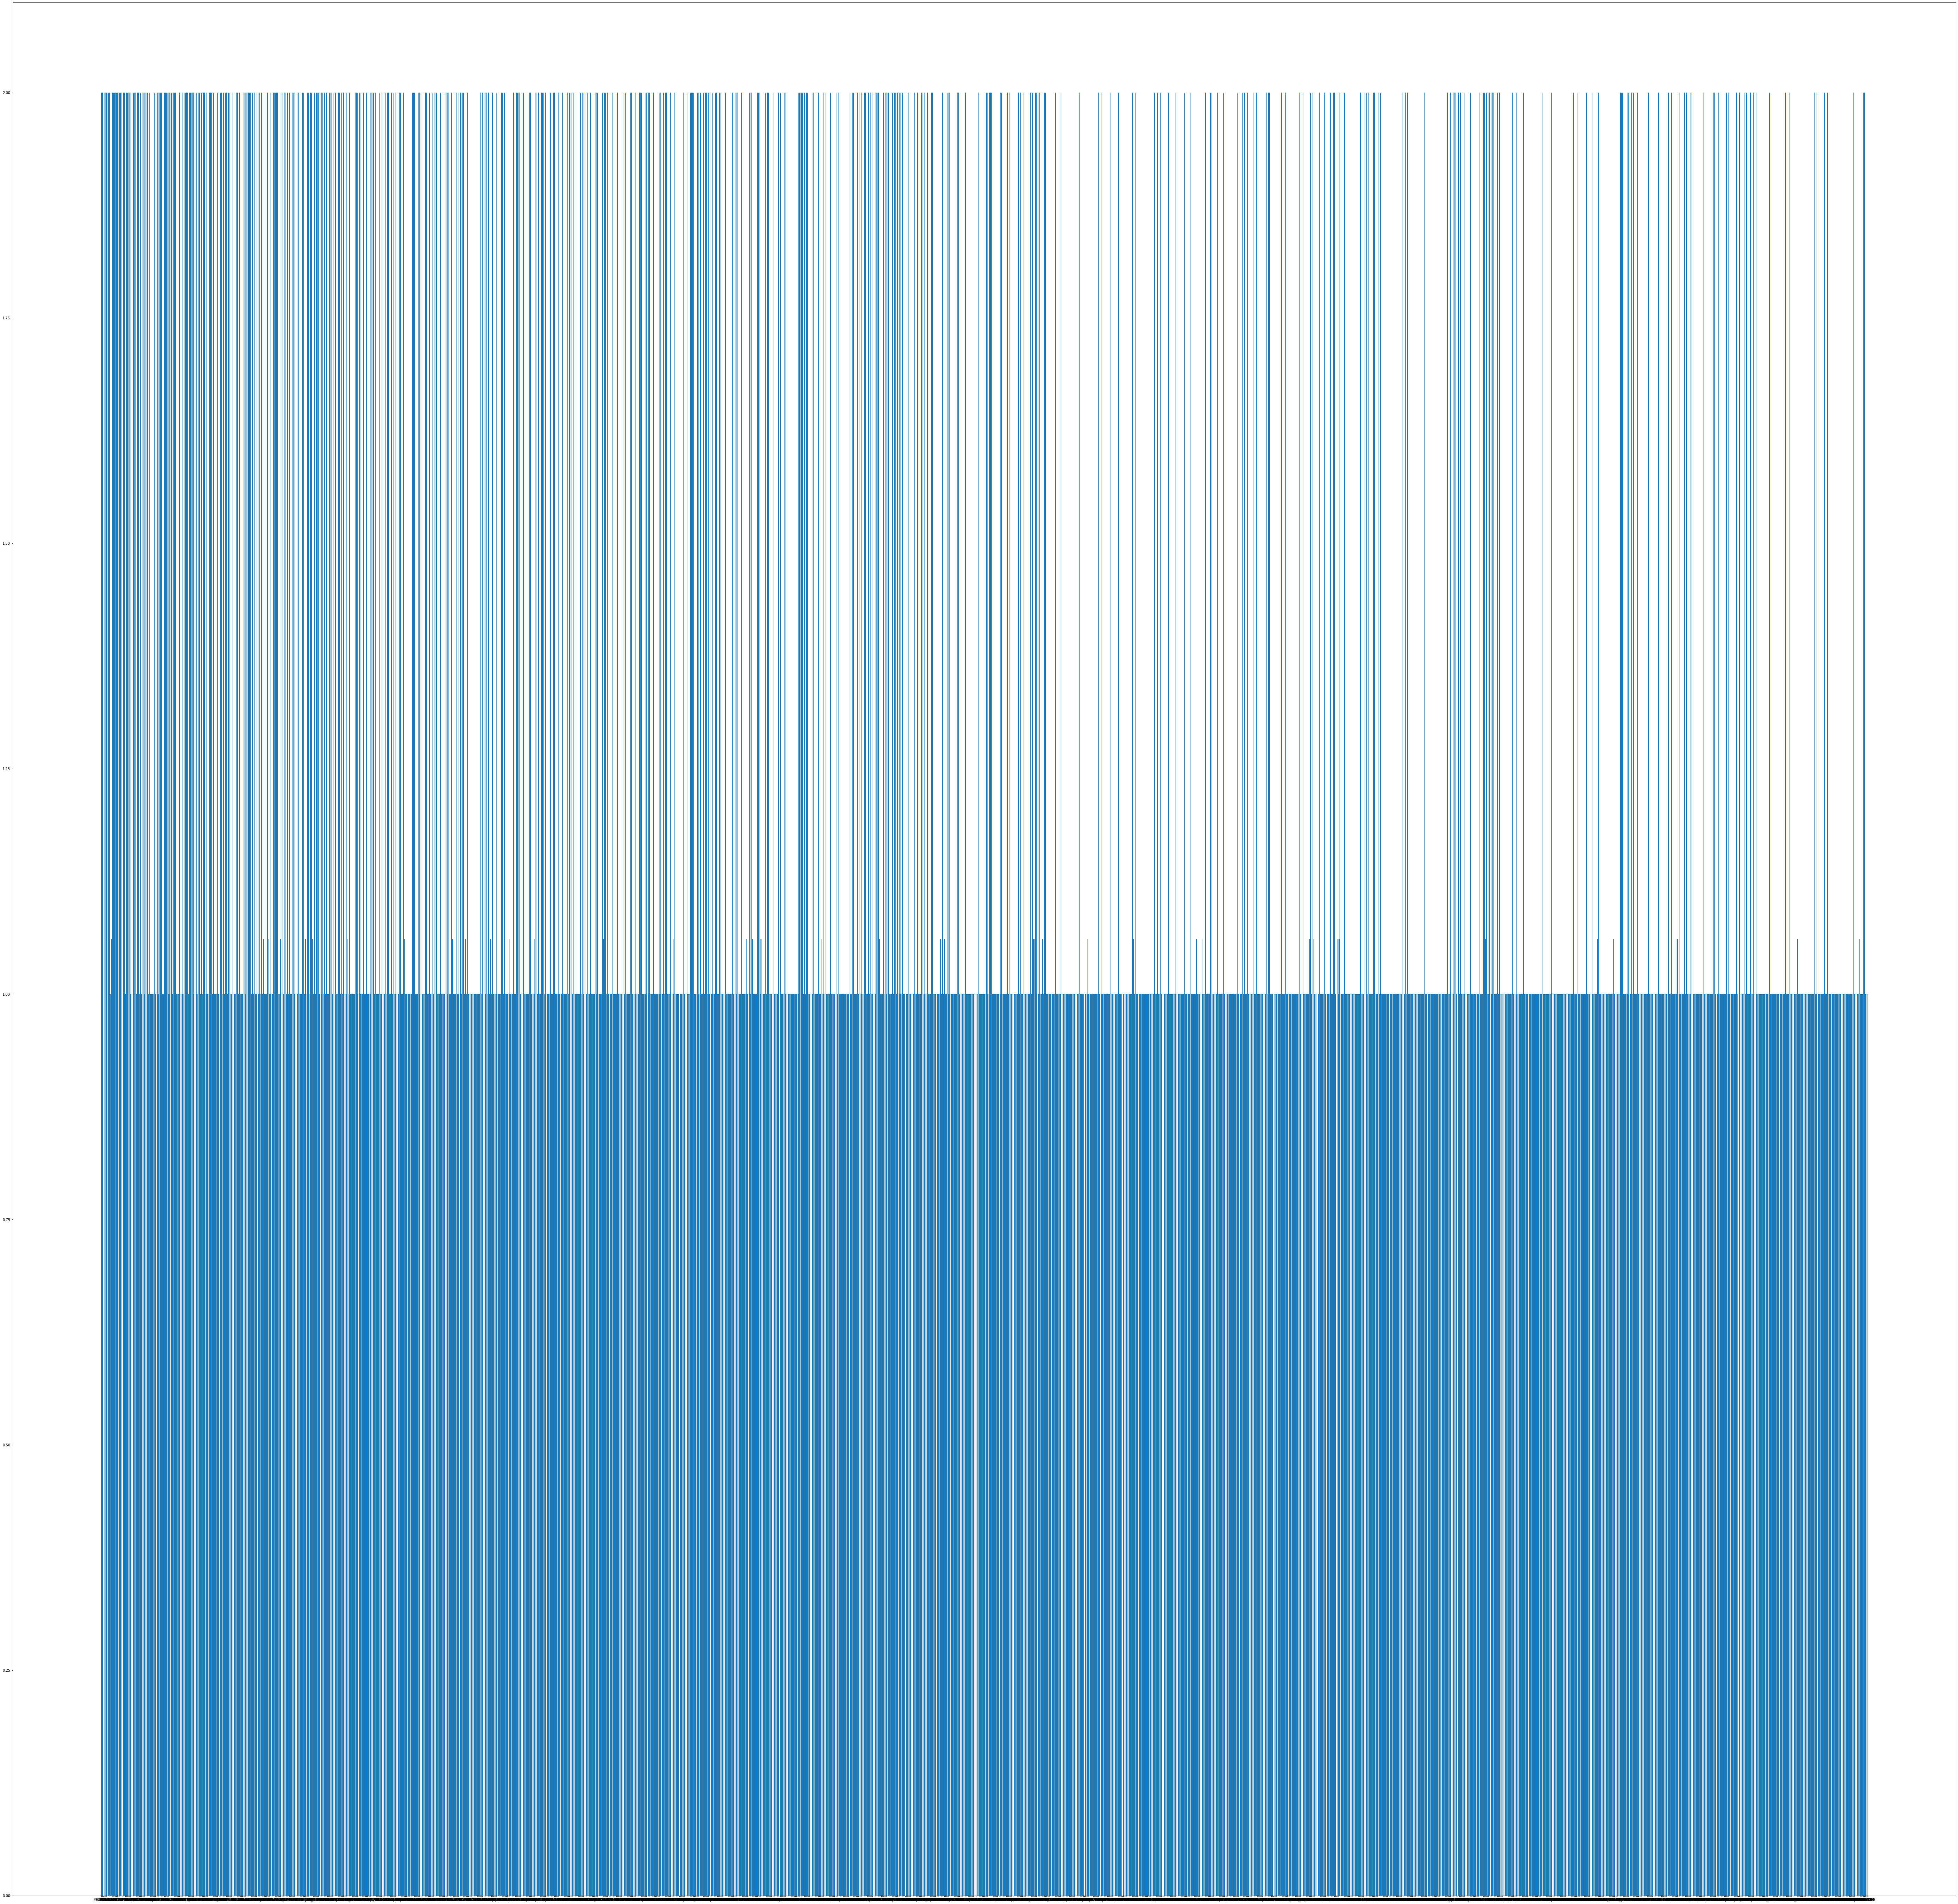

In [43]:
x = df['Model']
y = df['Aircraft Damage']

fig, ax = plt.subplots(figsize = (100, 100))
ax.bar(x,y)
#ax.set_title('Title')
#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_xticks(len(list(df['Model']))
#ax.set_xticklabels(df['Model'])